# What is a Loss Function and Loss?


* Definition of Loss function
> "The function we want to minimize or maximize is called the objective function or criterion. When we are minimizing it, we may also call it the cost function, loss function, or error function." 
> - Page 82, [Deep Learning](https://www.amazon.com/Deep-Learning-Adaptive-Computation-Machine/dp/0262035618/ref=as_li_ss_tl?_encoding=UTF8&qid=&sr=&linkCode=sl1&tag=inspiredalgor-20&linkId=e4e32749958369afb667e7e4323d65ba&language=en_US), 2016.

* Important job of the loss function in that it must faithfully distill all aspects of the model down into a single number in such a way that improvements in that number are a sign of a better model.
> "The cost function reduces all the various good and bad aspects of a possibly complex system down to a single number, a scalar value, which allows candidate solutions to be ranked and compared."
> -  Page 155, [Neural Smithing: Supervised Learning in Feedforward Artificial Neural Networks](https://www.amazon.com/Neural-Smithing-Supervised-Feedforward-Artificial/dp/0262527014/ref=as_li_ss_tl?ie=UTF8&qid=1540159852&sr=8-1&keywords=neural+smithing+book&linkCode=sl1&tag=inspiredalgor-20&linkId=af38756e17bbf1f49b22cf27ae937f21&language=en_US), 1999.

* Important of choosing a proper loss function.
> "It is important, therefore, that the function faithfully represent our design goals. If we choose a poor error function and obtain unsatisfactory results, the fault is ours for badly specifying the goal of the search"
> -  Page 155, [Neural Smithing: Supervised Learning in Feedforward Artificial Neural Networks](https://www.amazon.com/Neural-Smithing-Supervised-Feedforward-Artificial/dp/0262527014/ref=as_li_ss_tl?ie=UTF8&qid=1540159852&sr=8-1&keywords=neural+smithing+book&linkCode=sl1&tag=inspiredalgor-20&linkId=af38756e17bbf1f49b22cf27ae937f21&language=en_US), 1999.

# Maximum Likelihood

# Maximum Likelihood and Cross-Entropy

# What Loss Function to Use?

# Loss Functions and Reported Model Performance

# Experiments

In [1]:
from sklearn import datasets
from sklearn import preprocessing

from numpy import where

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from matplotlib import pyplot

In [2]:
def train_and_test(model, epoch_num):
    # fit model
    history = model.fit(trainX,
                        trainy,
                        validation_data=(testX, testy),
                        epochs=epoch_num,
                        verbose=0)

    # evaluate the model
    _, train_mse = model.evaluate(trainX, trainy, verbose=0)
    _, test_mse = model.evaluate(testX, testy, verbose=0)
    print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
    
    return history

## Regression Functions

In [3]:
def build_dataset():
    # generate regression dataset
    X, y = datasets.make_regression(n_samples=1000,
                                n_features=20,
                                noise=0.1,
                                random_state=1)
    
    # standardize dataset
    X = preprocessing.StandardScaler().fit_transform(X)
    y = preprocessing.StandardScaler().fit_transform(y.reshape(len(y), 1))[:, 0]
    
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    
    return trainX, trainy, testX, testy

In [4]:
def build_model(loss, metrics):
    model = tf.keras.Sequential()
    model.add(
        layers.Dense(25,
                     input_dim=20,
                     activation='relu',
                     kernel_initializer='he_uniform'))
    model.add(layers.Dense(1, activation='linear'))
    opt = optimizers.SGD(lr=0.01, momentum=0.9)
    model.compile(loss=loss, optimizer=opt, metrics=metrics)
    
    return model

### mean_squared_error

In [5]:
# set dataset
trainX, trainy, testX, testy = build_dataset()

# define model
model = build_model(loss='mean_squared_error', metrics=['mse'])

# fit modelactivation2
history = train_and_test(model=model, epoch_num=100)

Train: 0.001, Test: 0.004


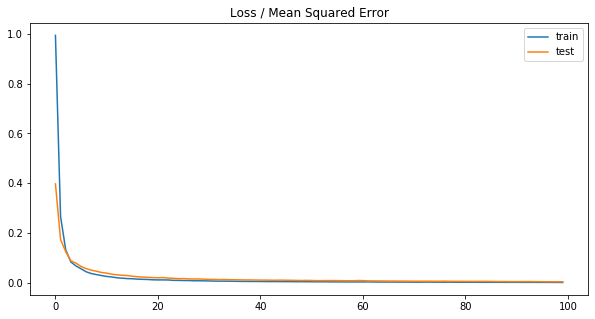

In [6]:
# plot loss during training
fig= pyplot.figure(figsize=(10,5))

pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

### mean_squared_logarithmic_error

In [7]:
# set dataset
trainX, trainy, testX, testy = build_dataset()

# define model
model = build_model(loss='mean_squared_logarithmic_error', metrics=['mse'])

# fit model
history = train_and_test(model=model, epoch_num=100)

W0618 20:59:39.522752 4429338048 deprecation.py:323] From /anaconda3/envs/tf_2.0/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train: 0.220, Test: 0.265


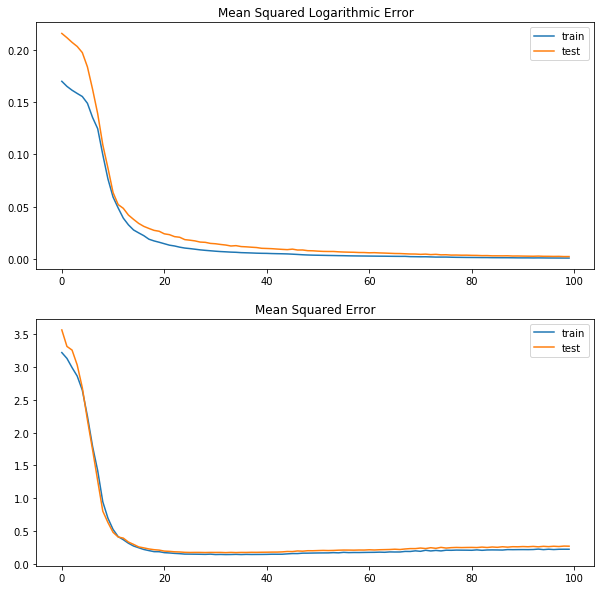

In [8]:
# plot loss during training
fig = pyplot.figure(figsize=(10, 10))

pyplot.subplot(211)
pyplot.title('Mean Squared Logarithmic Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot mse during training
pyplot.subplot(212)
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['mse'], label='train')
pyplot.plot(history.history['val_mse'], label='test')
pyplot.legend()
pyplot.show()

### mean_absolute_error

In [9]:
# set dataset
trainX, trainy, testX, testy = build_dataset()

# define model
model = build_model(loss='mean_absolute_error', metrics=['mse'])

# fit model
history = train_and_test(model=model, epoch_num=100)

Train: 0.005, Test: 0.006


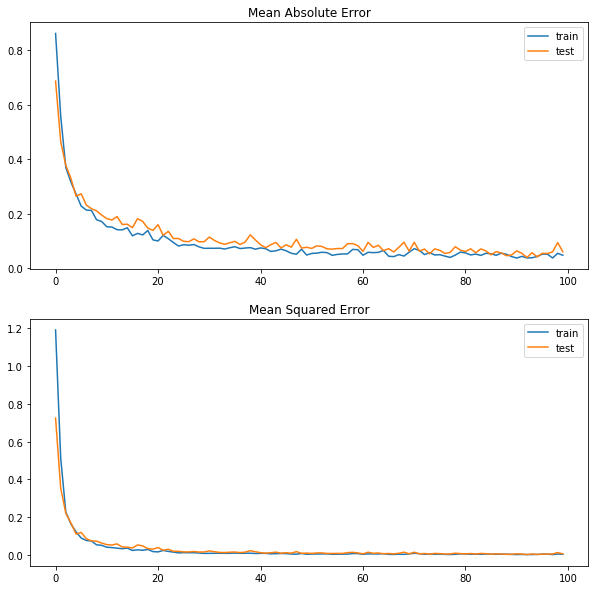

In [10]:
# plot loss during training
fig= pyplot.figure(figsize=(10,10))

pyplot.subplot(211)
pyplot.title('Mean Absolute Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot mse during training
pyplot.subplot(212)
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['mse'], label='train')
pyplot.plot(history.history['val_mse'], label='test')
pyplot.legend()
pyplot.show()

---

## Binary Classification Loss Functions

In [11]:
def build_dataset(change_y=False):
    # generate circles
    X, y = datasets.make_circles(n_samples=1000, noise=0.1, random_state=1)

    if change_y:
        # change y from {0,1} to {-1,1}
        y[where(y == 0)] = -1

    # select indices of points with each class label
    for i in range(2):
        if change_y:
            if i == 0: i=-1
        samples_ix = where(y == i)
        pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
    pyplot.legend()
    pyplot.show()

    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]

    return trainX, trainy, testX, testy

In [12]:
def build_model(loss, metrics):
    model = tf.keras.Sequential()
    model.add(
        layers.Dense(50,
                     input_dim=2,
                     activation='relu',
                     kernel_initializer='he_uniform'))
    model.add(layers.Dense(1, activation='sigmoid'))
    opt = optimizers.SGD(lr=0.01, momentum=0.9)
    model.compile(loss=loss, optimizer=opt, metrics=metrics)
    
    return model

### binary_crossentropy

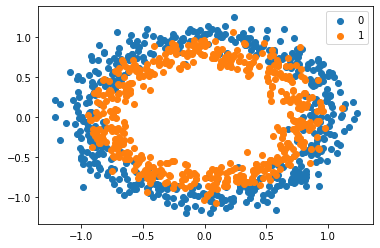

Train: 0.840, Test: 0.844


In [13]:
# set dataset
trainX, trainy, testX, testy = build_dataset(change_y=False)

# define model
model = build_model(loss='binary_crossentropy', metrics=['acc'])

# fit model
history = train_and_test(model=model, epoch_num=200)

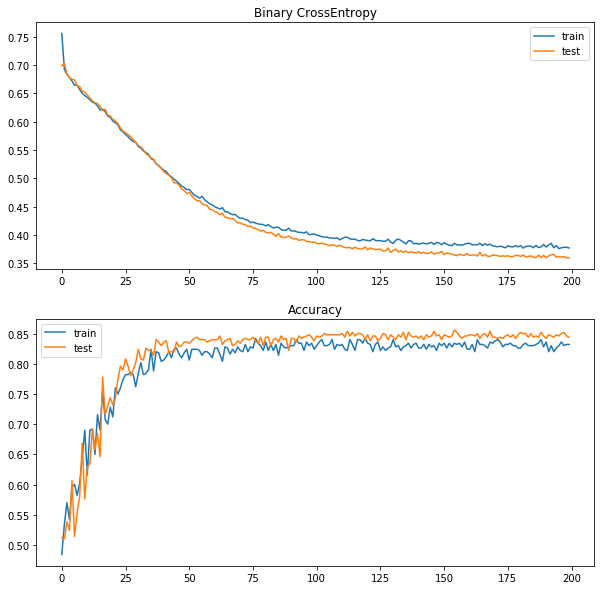

In [14]:
# plot loss during training
fig= pyplot.figure(figsize=(10,10))

pyplot.subplot(211)
pyplot.title('Binary CrossEntropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

### hinge

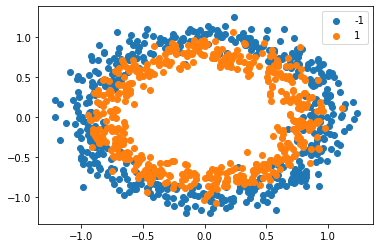

Train: 0.422, Test: 0.432


In [15]:
# set dataset
trainX, trainy, testX, testy = build_dataset(change_y=True)

# define model
model = build_model(loss='hinge', metrics=['acc'])

# fit model
history = train_and_test(model=model, epoch_num=200)

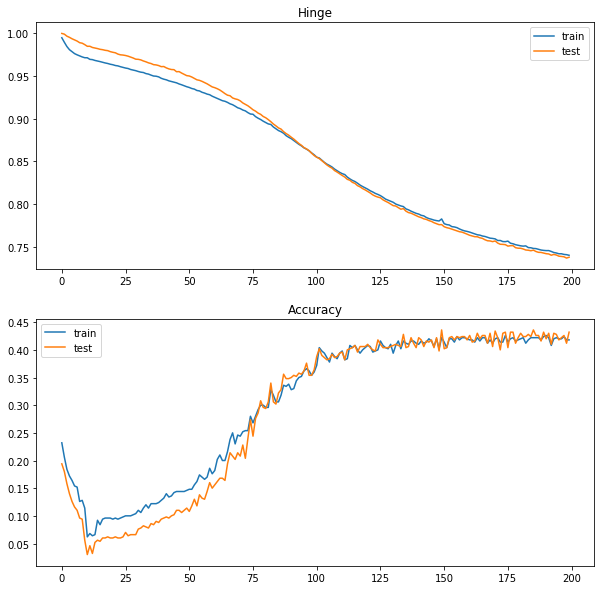

In [16]:
# plot loss during training
fig= pyplot.figure(figsize=(10,10))

pyplot.subplot(211)
pyplot.title('Hinge')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

### squared_hinge

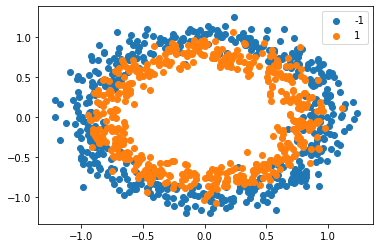

Train: 0.258, Test: 0.268


In [17]:
# set dataset
trainX, trainy, testX, testy = build_dataset(change_y=True)

# define model
model = build_model(loss='squared_hinge', metrics=['acc'])

# fit model
history = train_and_test(model=model, epoch_num=200)

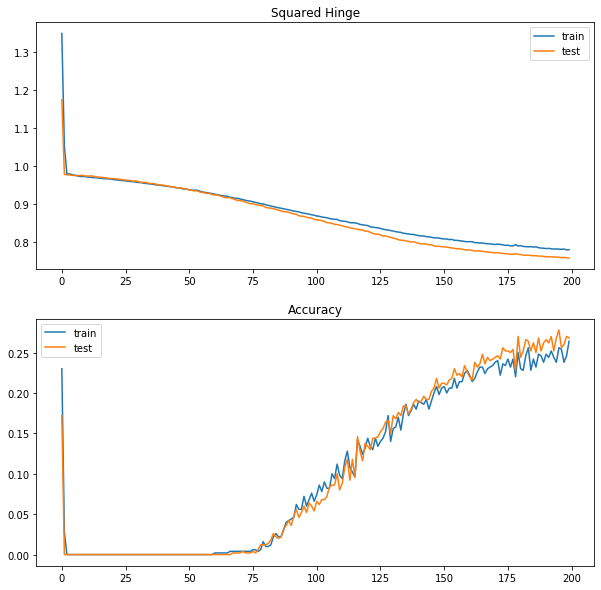

In [18]:
# plot loss during training
fig= pyplot.figure(figsize=(10,10))

pyplot.subplot(211)
pyplot.title('Squared Hinge')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

---

## Multi-Class Classification Loss Functions

In [19]:
def build_dataset(categorical=False):
    # generate dataset
    X, y = datasets.make_blobs(n_samples=1000,
                           centers=3,
                           n_features=2,
                           cluster_std=2,
                           random_state=2)
        
    # select indices of points with each class label
    for i in range(3):
        samples_ix = where(y == i)
        pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1])
    pyplot.show()
    
    if categorical:
        # one hot encode output variable
        y = tf.keras.utils.to_categorical(y)
    
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    
    return trainX, trainy, testX, testy

In [20]:
def build_model(loss, metrics):
    # define model
    model = tf.keras.Sequential()
    model.add(
        layers.Dense(50,
                     input_dim=2,
                     activation='relu',
                     kernel_initializer='he_uniform'))
    model.add(layers.Dense(3, activation='softmax'))
    # compile model
    opt = optimizers.SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['acc'])
    
    return model

### categorical_crossentropy

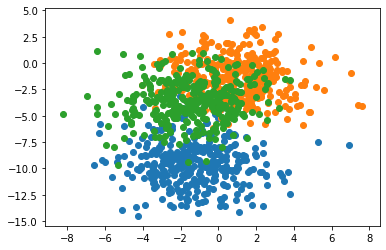

Train: 0.830, Test: 0.828


In [21]:
# set dataset
trainX, trainy, testX, testy = build_dataset(categorical=True)

# define model
model = build_model(loss='categorical_crossentropy', metrics=['acc'])

# fit model
history = train_and_test(model=model, epoch_num=100)

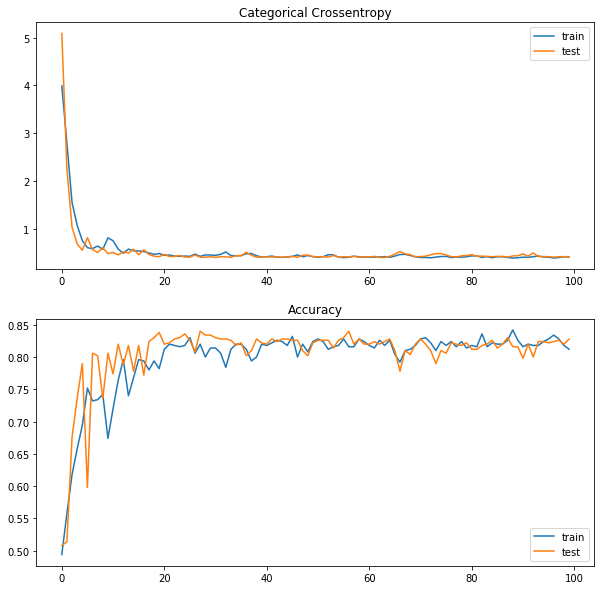

In [22]:
# plot loss during training
fig= pyplot.figure(figsize=(10,10))

pyplot.subplot(211)
pyplot.title('Categorical Crossentropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

### sparse_categorical_crossentropy

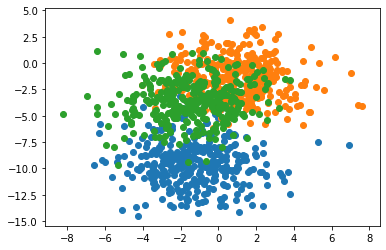

Train: 0.820, Test: 0.828


In [23]:
# set dataset
trainX, trainy, testX, testy = build_dataset(categorical=True)

# define model
model = build_model(loss='sparse_categorical_crossentropy', metrics=['acc'])

# fit model
history = train_and_test(model=model, epoch_num=100)

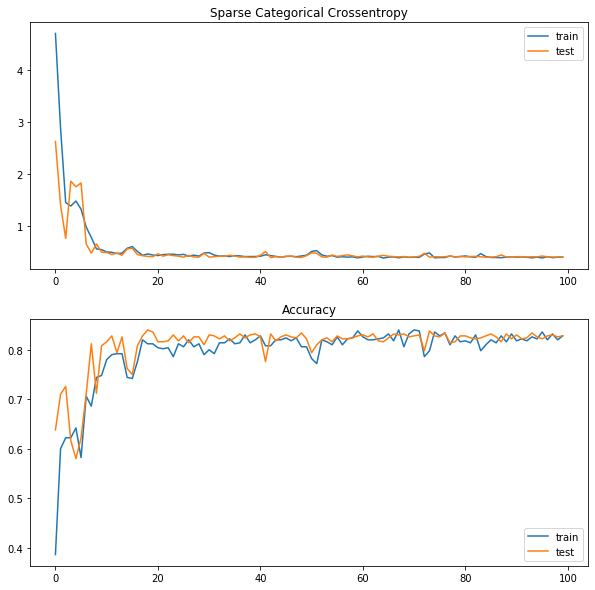

In [24]:
# plot loss during training
fig= pyplot.figure(figsize=(10,10))

pyplot.subplot(211)
pyplot.title('Sparse Categorical Crossentropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

### kullback_leibler_divergence

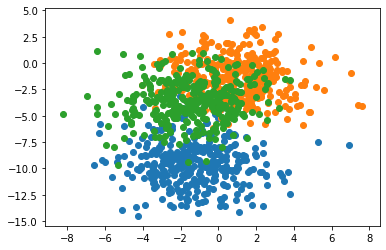

Train: 0.832, Test: 0.826


In [25]:
# set dataset
trainX, trainy, testX, testy = build_dataset(categorical=True)

# define model
model = build_model(loss='kullback_leibler_divergence', metrics=['acc'])

# fit model
history = train_and_test(model=model, epoch_num=100)

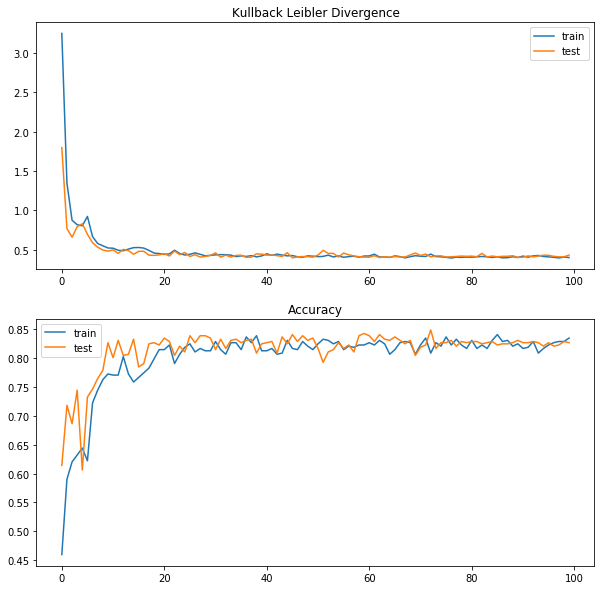

In [26]:
# plot loss during training
fig= pyplot.figure(figsize=(10,10))

pyplot.subplot(211)
pyplot.title('Kullback Leibler Divergence')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

---

Reference:  
- [MACHINE LEARNING MASTERY - Loss and Loss Functions for Training Deep Learning Neural Networks](https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/)
- [MACHINE LEARNING MASTERY - How to Choose Loss Functions When Training Deep Learning Neural Networks](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)